# Image segmentation using pixel clustering with K-Means from scratch
The source code is a implementation for Image segmentation using pixel clustering with K-Means from scratch. 

### Note
This code was written as my Machine Learning course's assignment in the fall of 2021, so it may have some bugs to fix or be coded more optimally.

### GitHub
https://github.com/MohsenEbadpour/

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
import scipy.io
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
import cv2   
import glob
import random
from sklearn.cluster import KMeans


plt.rcParams["figure.figsize"] = (20,12)
sns.set_theme(style="darkgrid", palette="pastel")

In [2]:
#read images
def read_images(dir="./data/2/*"):
    images = []
    imgs = list(glob.glob(dir))
    np.random.shuffle(imgs)
    for img in imgs:
        img_arr= cv2.imread(img)
        images.append(img_arr) 
    return images

Images = read_images ()
Images = np.array(Images,dtype=np.ndarray)

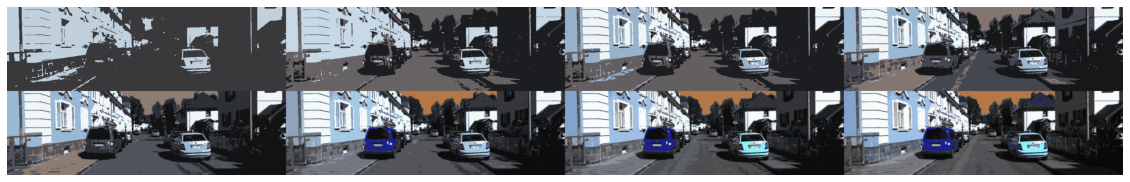

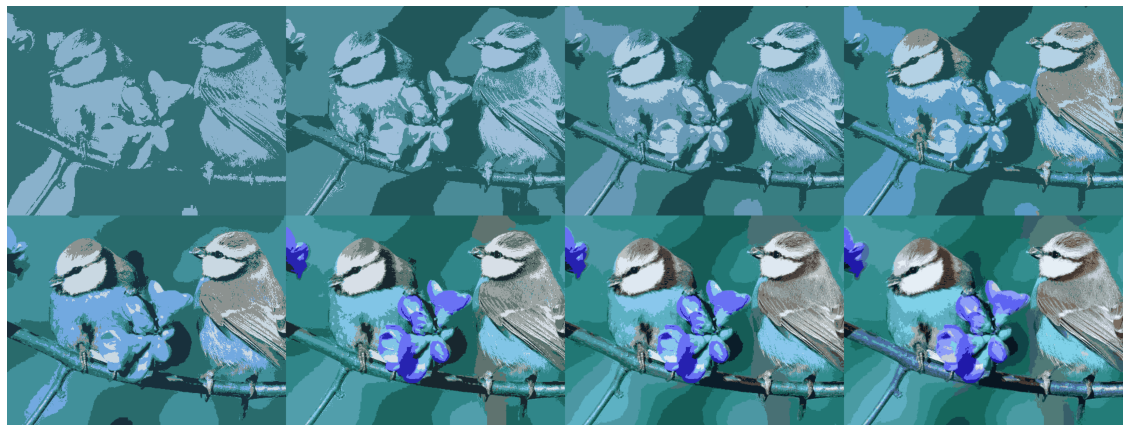

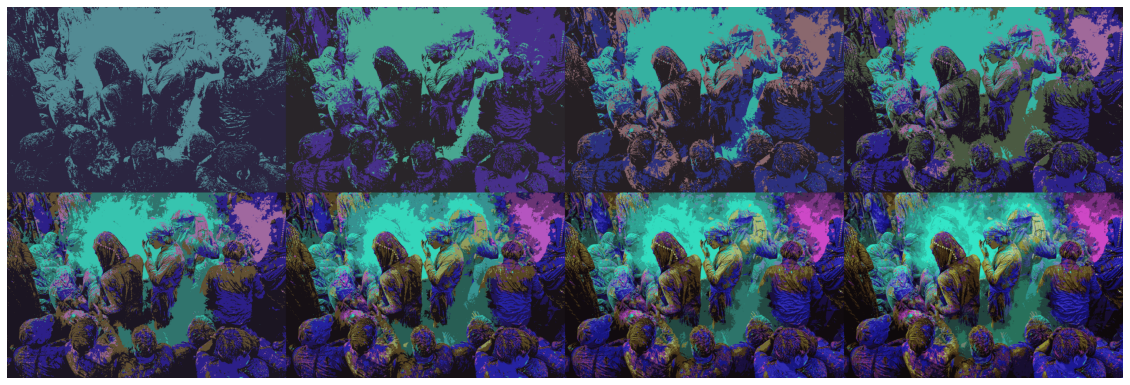

In [3]:
K = [2,3,4,5,6,10,15,20]

# concat multi images to one image with thier tile
def concat_tile(im_list_2d):
    return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])

im_tile = []

for i in range(len(Images)):
    #select an image and reshape it to (w*h)x3
    Index = 1
    image = Images[i]
    _size = image.shape
    image = np.reshape(image,(_size[0]*_size[1],_size[2]))
    
    # lists to save result for each clustering
    im_tile = []
    im_tile_row = []
    
    # cluster for each given k
    for k in K :
    
        # perform K-means
        kmean = KMeans(n_clusters=k,init="random").fit(image)
        
        # extract centers and labels
        Centers =  np.array(kmean.cluster_centers_,dtype=np.int32)
        Cluster = kmean.labels_
        
        # create a copy of image to color it with own Cluster`s centers
        _image = image.copy()
        
        # coloring
        for pix in range(image.shape[0]):
            _image[pix] = Centers[Cluster[pix]]
        
        # reshap to orginal size
        _image = np.reshape(_image,_size) 
        
        # creating 2d list of colored images to save and plot it(2x4)
        if k <=5 :
            im_tile_row.append(_image)
            if k ==5:                
                im_tile.append(np.array(im_tile_row))   
                im_tile_row = []
        elif k >=6 :
            im_tile_row.append(_image)
            if k ==20:                
                im_tile.append(np.array(im_tile_row))   
                im_tile_row = []
        
    
    # save the colored images and plot them
    im_tile = np.array(im_tile) 
    im_tile = concat_tile(np.array(im_tile))
    plt.axis('off')
    plt.imshow(im_tile)
    plt.show()   
    cv2.imwrite("./output-file-{0}.jpg".format(i+1),im_tile)
